# Do or die conversion rates in the NFL 

## Motivation 

Drives in the NFL depend on converting downs, either into first downs or touchdowns. Late in the game, conversions are extremely important. They allow a winning team to stay on offense and run out the clock, or a team playing from behind to continue its attempt to make a comback. Knowing a team's likelihood of converting a down is therefore an important component of game management. 

A noteable recent example was the Packer's loss to the Cardinals in overtime in the NFC divisional round, in which Aaron Rodgers and the Packers had a [miraculous fourth quarter comeback](https://www.youtube.com/watch?v=zcde3yKvKe8&list=PLRdw3IjKY2gnxWvFaAhgKcad4_Y_QR6RP&index=14) with the Packers scoring the (seemingly) game tying touchdown as time expired. The Packer defense infamously gave up a huge play to Larry Fitzgerald leading to a game ending Cardinals's touchdown. Aaron Rodgers and the Packer offense never got a chance to complete the comeback.

An [analysis on 538](http://fivethirtyeight.com/features/nfl-coaches-are-getting-away-with-crimes-against-middle-school-math/?ex_cid=538fb) suggested that the decision of Mike McCarthy and the coaching staff to kick the extra point and go for an overtime win was a huge mistake in game management. According to their analysis, the chances of converting the two point conversion (estimated at 47.2%) was higher than the chance of winning in overtime (42.9%). 

But are these numbers right?

The 47.2% chance of converting the two point conversion was based on the analysis of all conversion attempts made by any team since the 2001 season. This does not take into account any of the important game specific conditions, namely Packers offensive strength and Cardinals defensive strength, that can greatly impact the possibility of a Packers conversion prospects.

I'm not actually saying for certain that overtime was the right call. There's many reasons to suspect that the Packers's chances of winning in overtime were still worse than converting the two pointer. There offense and defense were both struggling with injuries, and the drive to even get the game tied depended on two miraculous catches which there wasn't any reason to suspect would happen again in overtime. 

But either way I think we may be able to get a better estimate of Pack's chance of converting the two point conversion and riding their way into one of the most legendary comebacks of all time.

In [185]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import patsy
import pandas as pd
import re

In [44]:
%matplotlib inline

In [294]:
data = pd.read_csv("data/all.csv")
data = data.sort_values(by=['Tm','Opp'])
data.head()

,Date,Tm,Opp,Quarter,Time,Down,ToGo,Location,Score,Yds,EPB,EPA,Unnamed: 12,success,TmScore,OppScore,ScoreDifferential
2784,2015-12-06,49ers,Bears,4,1:52,3,3,CHI 44,19-20,44,1.88,7.00,5.12,1,19,20,-1
2786,2015-12-06,49ers,Bears,2,4:27,3,5,SFO 34,13-13,26,0.30,2.92,2.62,1,13,13,0
2814,2015-12-06,49ers,Bears,2,11:22,3,1,SFO 40,6-13,4,0.96,1.86,0.90,1,6,13,-7
2815,2015-12-06,49ers,Bears,2,0:52,3,3,SFO 13,13-13,4,-0.60,-0.06,0.54,1,13,13,0
2857,2015-12-06,49ers,Bears,4,7:39,3,5,SFO 37,13-13,0,0.50,-0.91,-1.41,0,13,13,0


In [295]:
data.shape

(3398, 17)

,success
Tm,
49ers,0.428571
Bears,0.532110
Bengals,0.433333
Bills,0.420561
Broncos,0.409524
Browns,0.471698
Buccaneers,0.478723
Cardinals,0.500000
Chargers,0.542056


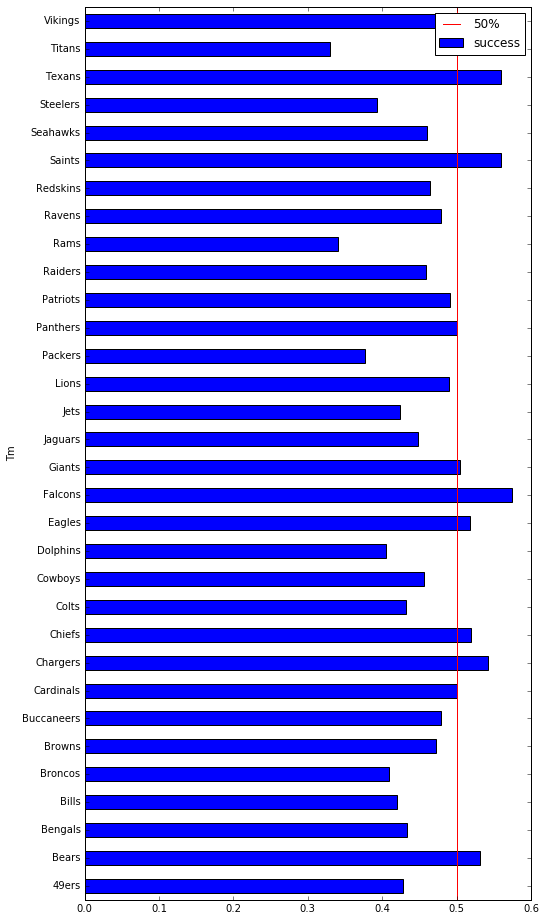

In [282]:
g = data.groupby("Tm")
s = g.agg({'success':lambda x: 1.*sum(x)/x.shape[0]})
s.plot(kind='barh',figsize=(8,16),xlim=(0,.6))
plt.plot([.5,.5],[-1,32],c='r',label="50%")
plt.legend(loc="best");

s

,success
Opp,
49ers,0.447368
Bears,0.538462
Bengals,0.509434
Bills,0.448980
Broncos,0.420000
Browns,0.491228
Buccaneers,0.510000
Cardinals,0.435897
Chargers,0.500000


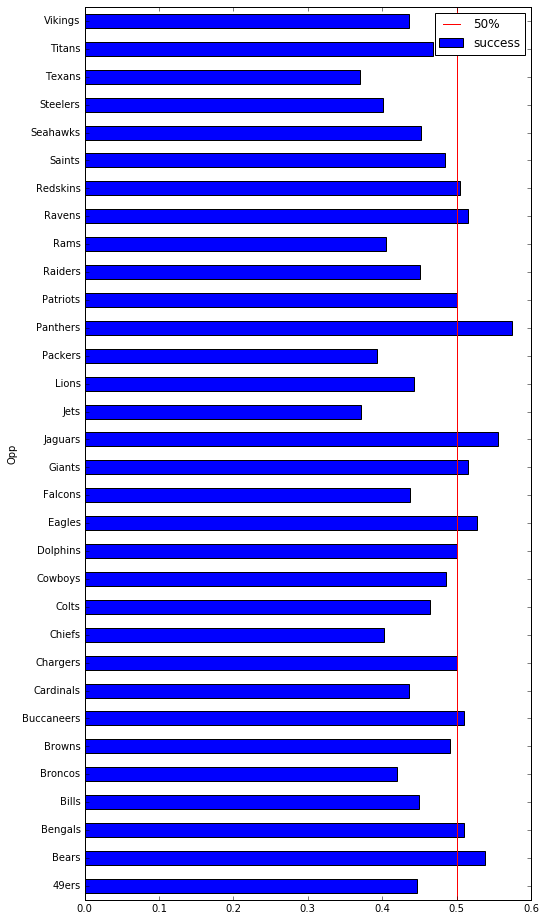

In [283]:
g = data.groupby("Opp")
s = g.agg({'success':lambda x: 1.*sum(x)/x.shape[0]})
s.plot(kind='barh',figsize=(8,16),xlim=(0,.6))
plt.plot([.5,.5],[-1,32],c='r',label="50%")
plt.legend(loc="best");

s

In [179]:
y,x = patsy.dmatrices('success ~ 0 + Tm + Opp + ToGo + ScoreDifferential',data)
y = y[:,0]

In [180]:
lm = linear_model.LogisticRegression(C=1)

In [181]:
lm.fit(x,y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [182]:
x.design_info.column_names

['Tm[49ers]',
 'Tm[Bears]',
 'Tm[Bengals]',
 'Tm[Bills]',
 'Tm[Broncos]',
 'Tm[Browns]',
 'Tm[Buccaneers]',
 'Tm[Cardinals]',
 'Tm[Chargers]',
 'Tm[Chiefs]',
 'Tm[Colts]',
 'Tm[Cowboys]',
 'Tm[Dolphins]',
 'Tm[Eagles]',
 'Tm[Falcons]',
 'Tm[Giants]',
 'Tm[Jaguars]',
 'Tm[Jets]',
 'Tm[Lions]',
 'Tm[Packers]',
 'Tm[Panthers]',
 'Tm[Patriots]',
 'Tm[Raiders]',
 'Tm[Rams]',
 'Tm[Ravens]',
 'Tm[Redskins]',
 'Tm[Saints]',
 'Tm[Seahawks]',
 'Tm[Steelers]',
 'Tm[Texans]',
 'Tm[Titans]',
 'Tm[Vikings]',
 'Opp[T.Bears]',
 'Opp[T.Bengals]',
 'Opp[T.Bills]',
 'Opp[T.Broncos]',
 'Opp[T.Browns]',
 'Opp[T.Buccaneers]',
 'Opp[T.Cardinals]',
 'Opp[T.Chargers]',
 'Opp[T.Chiefs]',
 'Opp[T.Colts]',
 'Opp[T.Cowboys]',
 'Opp[T.Dolphins]',
 'Opp[T.Eagles]',
 'Opp[T.Falcons]',
 'Opp[T.Giants]',
 'Opp[T.Jaguars]',
 'Opp[T.Jets]',
 'Opp[T.Lions]',
 'Opp[T.Packers]',
 'Opp[T.Panthers]',
 'Opp[T.Patriots]',
 'Opp[T.Raiders]',
 'Opp[T.Rams]',
 'Opp[T.Ravens]',
 'Opp[T.Redskins]',
 'Opp[T.Saints]',
 'Opp[T.Seahawks

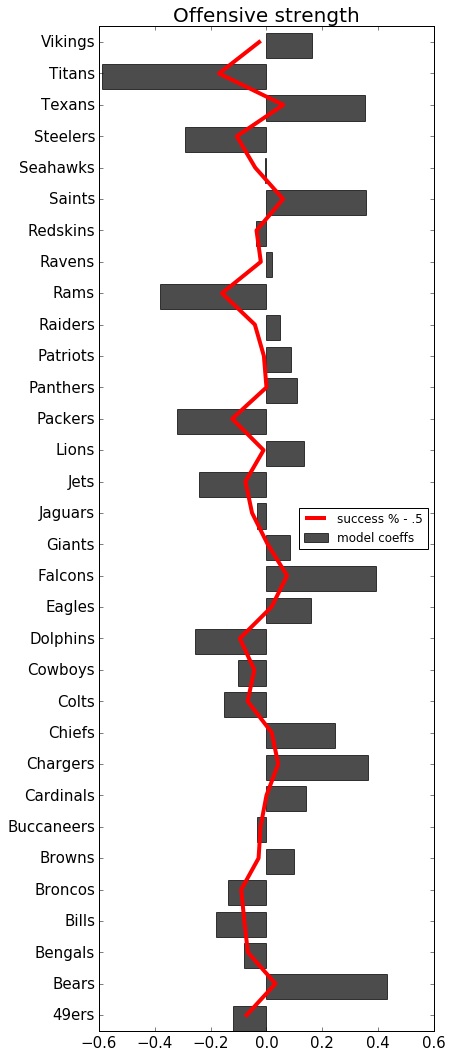

In [305]:
plt.figure(figsize=(6,18))
plt.barh(range(32),lm.coef_[0,:32],color="k",alpha=.7,label="model coeffs");

labels = [re.match('Tm\[(.*)\]',s).group(1) for s in x.design_info.column_names[:32]]
plt.yticks([.5+r for r in range(32)],labels,rotation=0,fontsize=15);
plt.xticks(fontsize=15)
plt.ylim(0,32)
plt.title("Offensive strength",fontsize=20)

g = data.groupby("Tm")
s = g.agg({'success':lambda x: 1.*sum(x)/x.shape[0]})
plt.plot(s.values-.5,[r + .5 for r in range(32)],linewidth=4,c="r",label="success % - .5")
plt.legend(loc="best");

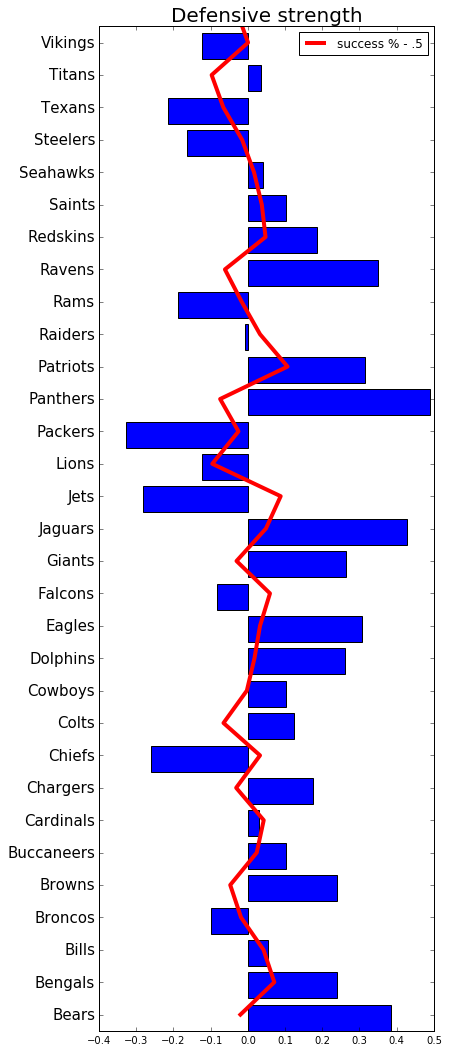

In [310]:
plt.figure(figsize=(6,18))
plt.barh(range(31),lm.coef_[0,32:63]);

labels = [re.match('Opp\[T\.(.*)\]',s).group(1) for s in x.design_info.column_names[32:63]]
plt.yticks([.5+r for r in range(32)],labels,rotation=0,fontsize=15);
plt.ylim(0,31)
plt.title("Defensive strength",fontsize=20)

g = data.groupby("Opp")
s = g.agg({'success':lambda x: 1.*sum(x)/x.shape[0]})
plt.plot(s-s.mean(),[r + .5 for r in range(32)],linewidth=4,c="r",label="success % - .5")
plt.legend(loc="best");

In [149]:
predict = {'Tm':'Packers','Opp':'Cardinals','ToGo':2,'ScoreDifferential':-1}
predict = patsy.build_design_matrices([x.design_info], predict)[0]

In [150]:
prob = lm.predict_proba(predict)[0]
prob

(array([ 0.59523518,  0.40476482]), 1.0)

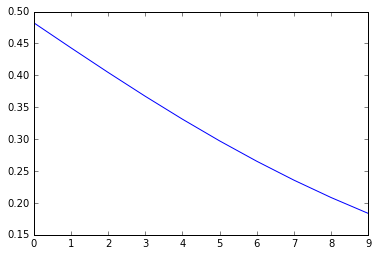

In [140]:
probs = []
for tg in range(10):
    predict = {'Tm':'Packers','Opp':'Cardinals','ToGo':tg,'ScoreDifferential':-1}
    predict = patsy.build_design_matrices([x.design_info], predict)[0]
    prob = lm.predict_proba(predict)[0]
    probs.append(prob[1])
    
plt.plot(probs)
# plt.ylim(.4,.41)

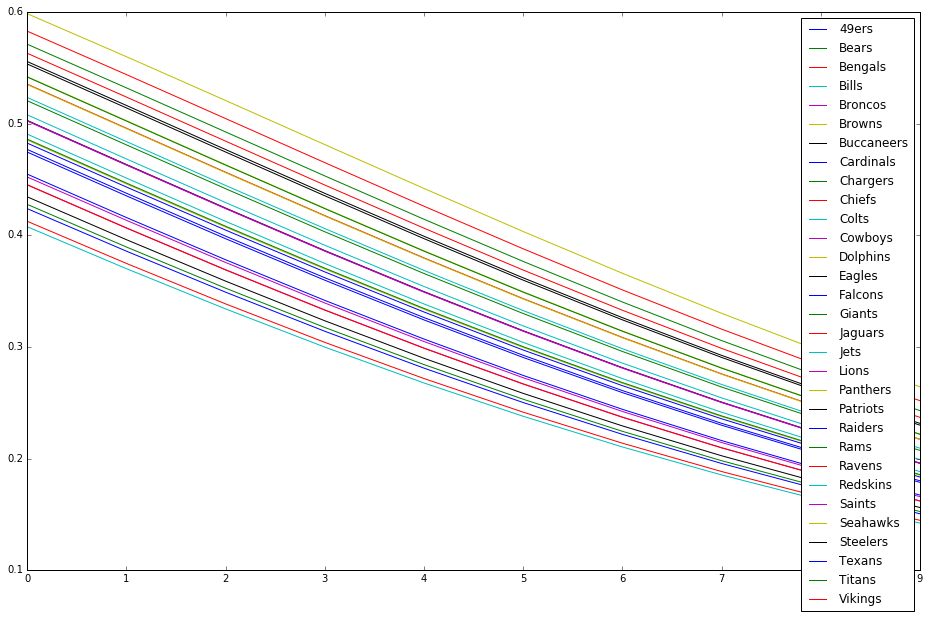

In [141]:
plt.figure(figsize=(16,10))
for tm in data.Tm.unique():
    if tm == "Packers":
        continue
    
    probs = []
    for tg in range(10):
        predict = {'Tm':'Packers','Opp':tm,'ToGo':tg,'ScoreDifferential':-1}
        predict = patsy.build_design_matrices([x.design_info], predict)[0]
        prob = lm.predict_proba(predict)[0]
        probs.append(prob[1])

    plt.plot(probs,label=tm)
    
plt.legend(loc="best")

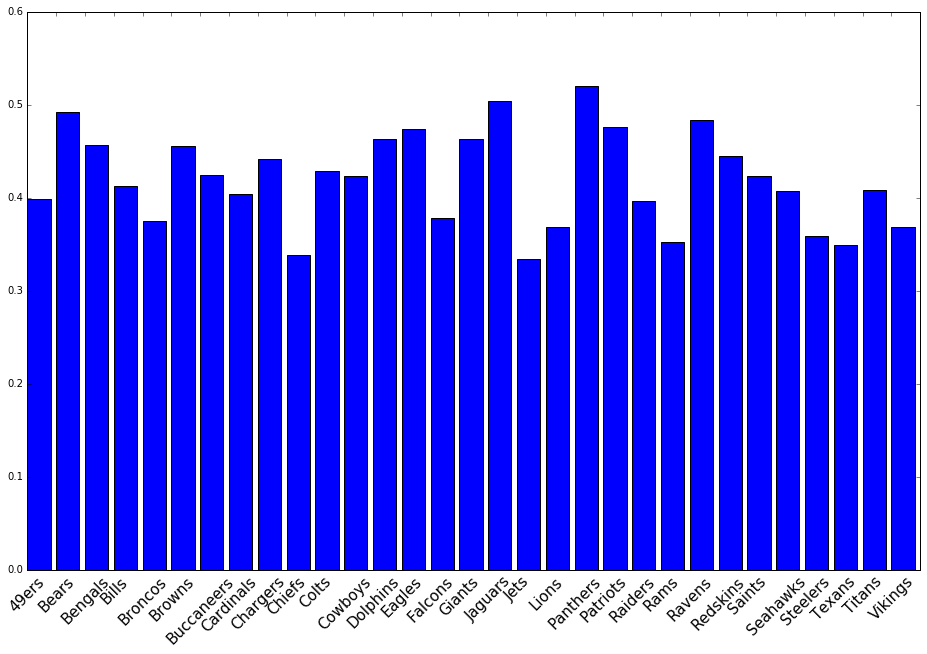

In [148]:
plt.figure(figsize=(16,10))
tms = []
probs = []
for tm in data.Tm.unique():
    if tm == "Packers":
        continue
        
    tms.append(tm)
    predict = {'Tm':'Packers','Opp':tm,'ToGo':2,'ScoreDifferential':-1}
    predict = patsy.build_design_matrices([x.design_info], predict)[0]
    prob = lm.predict_proba(predict)[0]
    probs.append(prob[1])

plt.bar(range(len(probs)),probs)
plt.xlim(0,31)
plt.xticks(range(len(probs)),tms,rotation=45,fontsize=15);

In [ ]:
lm.predict_proba()

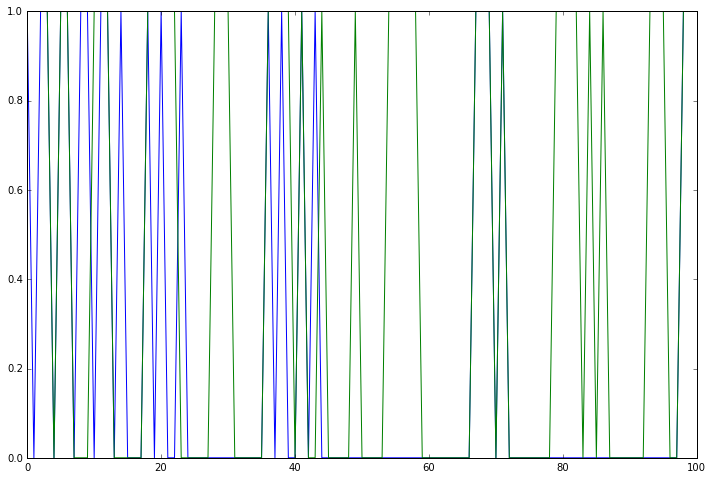

In [92]:
plt.figure(figsize=(12,8))
plt.plot(lm.predict(x)[:100])
plt.plot(y[:100]);
# plt.scatter(y,lm.predict(x))

In [ ]:
lm.pre

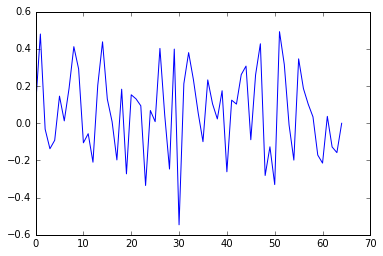

In [54]:
plt.plot(lm.coef_[0,:]);

In [53]:
lm.coef_[0,:]

array([  8.98442065e-02,   4.79498811e-01,  -3.20649735e-02,
        -1.37373089e-01,  -9.18124727e-02,   1.45513168e-01,
         1.24480265e-02,   1.87122291e-01,   4.11485631e-01,
         2.91651030e-01,  -1.05371649e-01,  -5.62923447e-02,
        -2.09681934e-01,   2.03554350e-01,   4.37494282e-01,
         1.29629552e-01,   7.99672358e-03,  -1.97453370e-01,
         1.82846151e-01,  -2.72300907e-01,   1.52796144e-01,
         1.30824976e-01,   9.36990240e-02,  -3.34952450e-01,
         6.83084324e-02,   8.40641881e-03,   4.02110558e-01,
         4.40254023e-02,  -2.46483757e-01,   3.98477843e-01,
        -5.46232864e-01,   2.12237061e-01,   3.79452435e-01,
         2.34238091e-01,   5.48806892e-02,  -9.93521517e-02,
         2.32770084e-01,   1.04215943e-01,   2.29823240e-02,
         1.74560027e-01,  -2.61178390e-01,   1.23871306e-01,
         1.02677170e-01,   2.61250885e-01,   3.07129941e-01,
        -8.88971519e-02,   2.60188945e-01,   4.26985341e-01,
        -2.81136402e-01,

In [165]:
fi = x.design_info.factor_infos[x.design_info.factor_infos.keys()[3]]

In [167]:
fi()

TypeError: 'FactorInfo' object is not callable